### 🛒 E-commerce Shipping Data Analysis Project

> **Project Themes:**  
1. **Feature Analysis on Customer Ratings**  
   - What features have the most influence on customer ratings (scale of 1 to 5)?  
   - Identify the relationships between customer behavior, product attributes, and rating scores.

2. **On-Time Delivery Prediction Using Machine Learning**  
   - Predict whether a product will be delivered on time or delayed.  
   - Develop a practical ML model to improve on-time delivery rates.

> **Data Source:**  
- Kaggle: Customer Analytics  
  [🔗 Kaggle Link](https://www.kaggle.com/datasets/prachi13/customer-analytics)

> **Project Period:**  
- Version 1: 2025-04-11 ~ 2025-04-24

In [1]:
import os
import pickle
import pandas as pd
import numpy as np

import missingno
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, accuracy_score, recall_score, f1_score, precision_score

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

In [2]:
# correlation_value1
def check_corr_vlaue(df, columns1, columns2):
    correlation, p_value  = pearsonr(df[columns1], df[columns2])
    return print(correlation, p_value)

# corraltion_value2 & p_value
def correlation_definition(df, columns1, columns2):
    corr_value, p_value = pearsonr(df[columns1], df[columns2])
    return print(f"{columns1}, {columns2} correlation value is {round(corr_value,3)}, and p_value is {p_value.round(3)}")

In [3]:
# 0.loading file
df_basic=pd.read_csv("data/E-commerce_Shipping_Data.csv")

## EDA & Data cleaning

#### 1. Exploratory Data Analysis (EDA)

In [4]:
df_basic.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [5]:
# preview of table
df_basic.head(5)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [6]:
df_basic.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

Reached.on.Time_Y.N
1    6563
0    4436
Name: count, dtype: int64


<Axes: xlabel='Reached.on.Time_Y.N'>

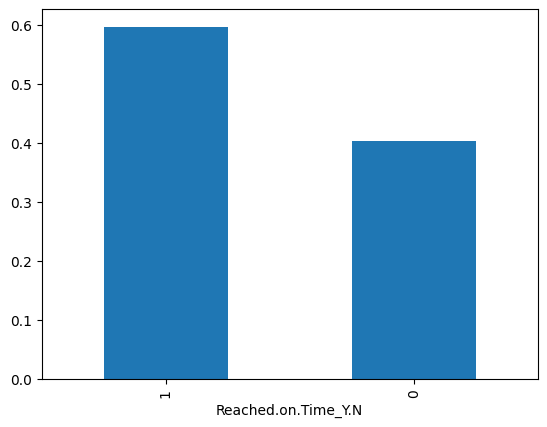

In [7]:
# Rate of Reached_on_time
print(df_basic['Reached.on.Time_Y.N'].value_counts())#normalize=True))
df_basic['Reached.on.Time_Y.N'].value_counts(normalize=True).plot(kind='bar')

In [8]:
# Check overall distribution of the dataset
df_basic.describe()

## Interpretation Tips:
# - A large standard deviation (std) indicates high variability in the data.
# - A wide range between min and max values may suggest the presence of outliers.

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [9]:
# normal code for EDA
#df_basic['Discount_offered'].value_counts()
#df_basic['Cost_of_the_Product'].describe()
#df_basic['Gender'].value_counts(normalize=True)

#### 2. Encoding for Anaylsis

In [10]:
# 1.copy befor encoding
df_encoding = df_basic.copy()
df_encoding=df_encoding.drop(columns=['ID'],axis=1)

gender = {'M':0, 'F':1}
product_impor = {'low':0, 'medium':1, 'high':2}
on_time_info = {0 : 'Y_on_time', 1:'N_late'}
re_enfo_ontime = {'N_late':0, 'Y_on_time':1}

In [11]:
# make Discount Rate
df_encoding["Discount_rate"] = round((df_encoding["Discount_offered"]/df_encoding["Cost_of_the_Product"])*100,2) 

# basic_encoding
df_encoding['Gender']=df_encoding['Gender'].map(gender)
df_encoding['Product_importance']=df_encoding['Product_importance'].map(product_impor)
df_encoding['Reached.on.Time_Y.N']=df_encoding['Reached.on.Time_Y.N'].map(on_time_info)
df_encoding['Reached_on_time_re']=df_encoding['Reached.on.Time_Y.N'].map(re_enfo_ontime)

# one-hot encoding
df_encoding = pd.get_dummies(df_encoding, columns=['Mode_of_Shipment','Warehouse_block'], dtype= int)

# delete columns _ reached_on_time
df_encoding=df_encoding.drop('Reached.on.Time_Y.N', axis=1)
df_encoding

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Discount_rate,Reached_on_time_re,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F
0,4,2,177,3,0,1,44,1233,24.86,0,1,0,0,0,0,0,1,0
1,4,5,216,2,0,0,59,3088,27.31,0,1,0,0,0,0,0,0,1
2,2,2,183,4,0,0,48,3374,26.23,0,1,0,0,1,0,0,0,0
3,3,3,176,4,1,0,10,1177,5.68,0,1,0,0,0,1,0,0,0
4,2,2,184,3,1,1,46,2484,25.00,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,4,1,252,5,1,1,1,1538,0.40,0,0,0,1,1,0,0,0,0
10995,4,1,232,5,1,1,6,1247,2.59,1,0,0,1,0,1,0,0,0
10996,5,4,242,5,0,1,4,1155,1.65,1,0,0,1,0,0,1,0,0
10997,5,2,223,6,1,0,2,1210,0.90,1,0,0,1,0,0,0,0,1


In [12]:
print('"Comparision columns Before and after"')
print('Before encoding :', df_basic.columns)
print('-------------------------------------------------')
print('After encoding :', df_encoding.columns)

"Comparision columns Before and after"
Before encoding : Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')
-------------------------------------------------
After encoding : Index(['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Product_importance', 'Gender', 'Discount_offered',
       'Weight_in_gms', 'Discount_rate', 'Reached_on_time_re',
       'Mode_of_Shipment_Flight', 'Mode_of_Shipment_Road',
       'Mode_of_Shipment_Ship', 'Warehouse_block_A', 'Warehouse_block_B',
       'Warehouse_block_C', 'Warehouse_block_D', 'Warehouse_block_F'],
      dtype='object')


## Analysis 1: Feature Analysis on Customer Rating

- Goal: Identify which features influence the customer rating (scale 1 to 5).
  + Explore the relationship between customer behavior, product attributes, and rating scores.


#### 📊 Correlation Analysis

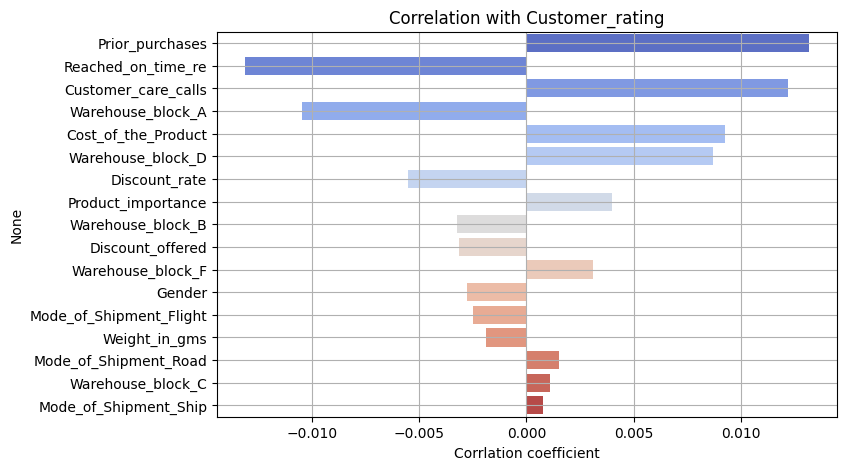

In [13]:
df_corr = df_encoding.copy()

corr_matrix = df_corr.corr()
target_corr = corr_matrix['Customer_rating'].drop("Customer_rating").sort_values(key=abs, ascending=False)

# Visualization
plt.figure(figsize=(8,5))
sns.barplot(x=target_corr.values, y=target_corr.index, palette="coolwarm")
plt.title("Correlation with Customer_rating")
plt.xlabel("Corrlation coefficient")
plt.grid(True)
plt.show()

> Key findings from correlation analysis:

- **Positive correlation** (as values increase, rating tends to increase):
  - `Prior_purchases` (Number of previous purchases)  
  - `Customer_care_calls` (Customer service interactions)  
  - `Cost_of_the_Product` (Product price)

- **Negative correlation** (as values increase, rating tends to decrease):
  - `Reached_on_time_re` (On-time delivery status)  
  - `Discount_rate` (Discount percentage)

<details>
<summary>🔍 Interpretation</summary>

1. **Overall correlation coefficients are very weak**, typically around 0.01.  
   However, the **p-values are statistically significant**, indicating that the weak relationships are not due to random noise.

2. Some features such as `Warehouse_block_A` and `Warehouse_block_D` had relatively higher coefficients,  
   but were excluded due to a lack of domain relevance and interpretability.

3. Features that might logically affect ratings, such as `Cost_of_the_Product` and `Discount_rate`,  
   did not show consistent influence in this dataset and were therefore excluded.

</details>

---


#### 📌 Additional Notes for Learners

- **Correlation analysis** helps identify linear relationships between variables.
- A high **correlation coefficient (near +1 or -1)** indicates strong linear relationships,  
  while a value near **0** suggests weak or no linear trend.
- Always consider **p-values** to check whether the observed correlation is statistically meaningful.

---

In [14]:
grouping_feature = ['Prior_purchases', 'Customer_care_calls', 'Cost_of_the_Product', 'Customer_rating',"Discount_rate"]

df_grouping = df_encoding[grouping_feature].copy()

pd.pivot_table(df_grouping,
               index='Customer_rating',
               values=["Prior_purchases","Customer_care_calls","Cost_of_the_Product","Discount_rate"],
               aggfunc='min')

,Cost_of_the_Product,Customer_care_calls,Discount_rate,Prior_purchases
Customer_rating,,,,
1,96,2,0.32,2
2,96,2,0.32,2
3,96,2,0.32,2
4,97,2,0.32,2
5,98,2,0.32,2


In [15]:
df_grouping[df_grouping['Customer_rating']==1].describe()

,Prior_purchases,Customer_care_calls,Cost_of_the_Product,Customer_rating,Discount_rate
count,2235.000000,2235.000000,2235.000000,2235.0,2235.000000
mean,3.529306,4.036242,208.979866,1.0,7.115808
std,1.494968,1.142502,48.090681,0.0,9.440874
min,2.000000,2.000000,96.000000,1.0,0.320000
25%,2.000000,3.000000,169.000000,1.0,1.750000
50%,3.000000,4.000000,213.000000,1.0,3.380000
75%,4.000000,5.000000,250.000000,1.0,6.375000
max,10.000000,7.000000,310.000000,1.0,59.050000


In [16]:
df_grouping[df_grouping['Customer_rating']==5].describe()

,Prior_purchases,Customer_care_calls,Cost_of_the_Product,Customer_rating,Discount_rate
count,2171.000000,2171.000000,2171.000000,2171.0,2171.000000
mean,3.585905,4.090742,211.164901,5.0,7.048291
std,1.549896,1.172481,49.190933,0.0,9.210930
min,2.000000,2.000000,98.000000,5.0,0.320000
25%,3.000000,3.000000,168.000000,5.0,1.730000
50%,3.000000,4.000000,218.000000,5.0,3.300000
75%,4.000000,5.000000,253.000000,5.0,6.540000
max,10.000000,7.000000,310.000000,5.0,52.170000


#### 📉 Final Summary

- Despite testing various models and inspecting feature relationships,  
  no clear patterns were found that significantly explained rating behavior.

> Conclusion:  
The customer ratings in this dataset appear **uniformly distributed** across many features,  
making it difficult to derive insights. This is also why correlation values remained weak.

→ **Future work** should include collecting more data or richer customer feedback features to build a more robust rating analysis model.

## Analysis 2: On-Time Delivery Prediction Using Machine Learning

### Objective

- Predict whether a product will be delivered **on time (1)** or **delayed (0)**.
- Develop a machine learning model that can be practically applied to improve **on-time delivery performance** in business.

### 2-1) Histogram: Feature Distribution Check

Before model fitting, histograms were used to examine the distribution of each feature.

- **Purpose**: Check whether each feature is **well distributed** or **heavily skewed**, which could affect model training.

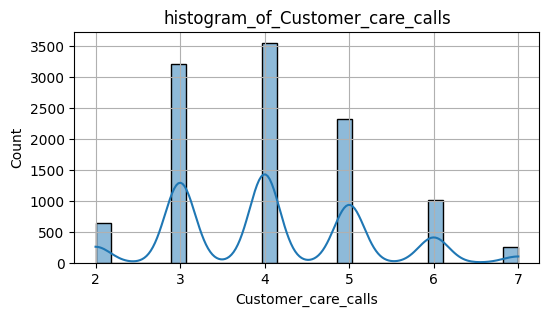

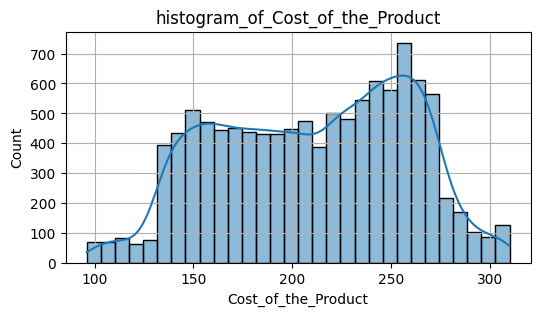

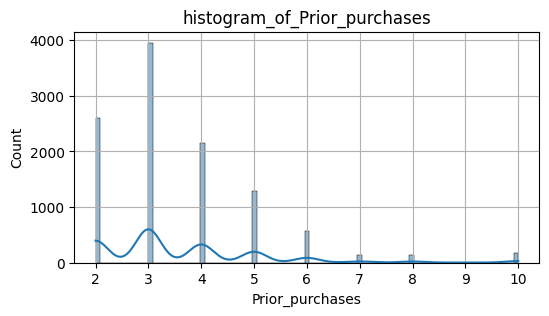

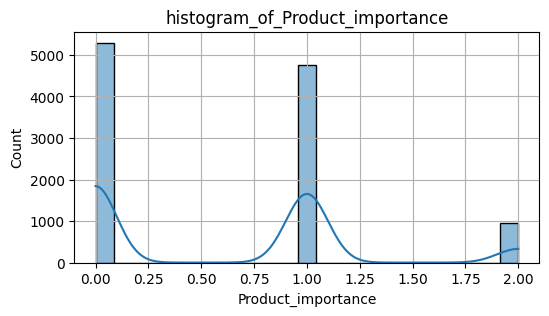

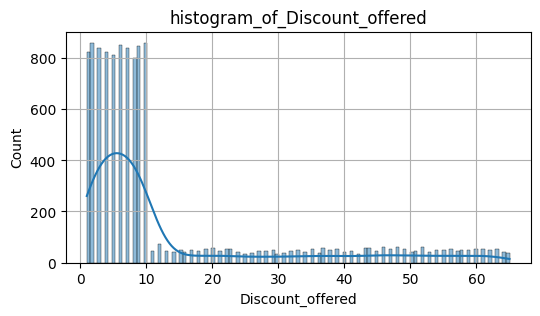

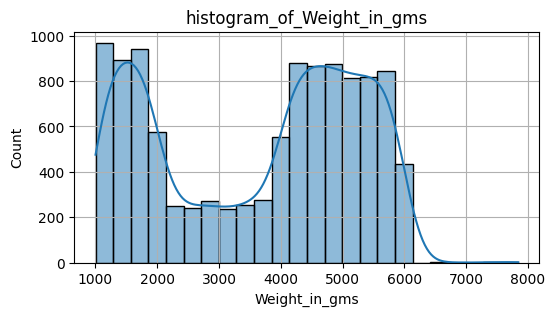

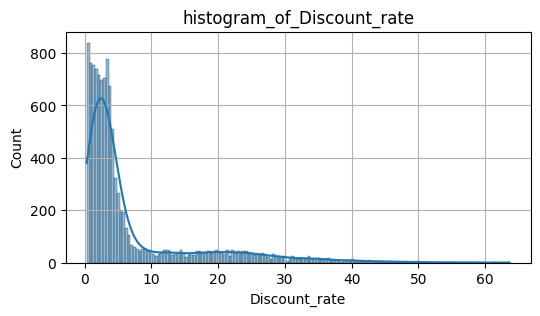

In [17]:
selected_features_for_histogram = [
    'Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases',
    'Product_importance', 'Discount_offered', 'Weight_in_gms',
    'Discount_rate']

for col in selected_features_for_histogram:
    plt.figure(figsize=(6,3))
    sns.histplot(df_encoding[col], kde=True)
    plt.title(f"histogram_of_{col}")
    plt.grid(True)
    plt.show()

### 2-2) First Machine Learning Fit & Predict

> **Explanation**

- The histograms revealed that the features were **relatively well distributed**, with no major imbalances.
- Initial predictions using various models showed that **tree-based models** performed the best overall.

In [18]:
selected_features = [
    'Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases',
    'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
    'Discount_rate', 'Mode_of_Shipment_Flight', 'Mode_of_Shipment_Road',
    'Mode_of_Shipment_Ship', 'Warehouse_block_A', 'Warehouse_block_B',
    'Warehouse_block_C', 'Warehouse_block_D', 'Warehouse_block_F'
]

target = 'Reached_on_time_re'


df_delivery_ml = df_encoding.copy()
X = df_delivery_ml[selected_features]
y = df_delivery_ml[target] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


models = {
    "LogisticRegression" : LogisticRegression(),
    "SVM" : SVC(),
    "RandomForest" : RandomForestClassifier(n_estimators=100, random_state=42),
    "GradientBoosting" : GradientBoostingClassifier(n_estimators=100, random_state=42),
    "XGBoost" : XGBClassifier(n_estimators=100, random_state=42),
    "LightGBM" : LGBMClassifier(n_estimators=100, random_state=42, verbosity=-1)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    results.append((name, acc, recall, precision, f1))

#### 🥇 Model Ranking

In [19]:
pd.DataFrame(results, columns=['model', 'accuracy', 'recall', 'precision', 'f1']).sort_values(by=['accuracy','recall','precision'], ascending=False)

,model,accuracy,recall,precision,f1
3,GradientBoosting,0.680909,0.881860,0.563017,0.687259
1,SVM,0.668788,0.634909,0.575674,0.603842
5,LightGBM,0.661212,0.721799,0.557059,0.628818
2,RandomForest,0.656667,0.647866,0.558843,0.600071
4,XGBoost,0.656061,0.633384,0.559596,0.594208
0,LogisticRegression,0.628485,0.564024,0.530846,0.546933


1. **Gradient Boosting**
   - Achieved the **highest accuracy, recall, and F1-score**.
   - Especially effective in **recall**, meaning it could correctly identify most on-time deliveries.

2. **LightGBM**
   - Performance was close to Gradient Boosting.
   - **Faster and more lightweight**, making it suitable for **real-world deployment** where model size and speed matter.

> **Conclusion**  
Since the goal of this mini project is to gain end-to-end experience in ML development and deployment,  
we selected **LightGBM** as the **Champion Model** due to its **balance of performance and efficiency**.

---

### 2-3) Hyperparameter Tuning & Cross-Validation

- **Step 1: Randomized Search**  
  Quickly explores a broad range of hyperparameter values.

- **Step 2: Grid Search**  
  Fine-tunes the search around promising ranges found in Step 1.
<details>
<summary>🔁 Cross-Validation Strategy</summary>

- Used **Stratified K-Fold Cross-Validation** to maintain the original class distribution in each fold.
- This ensures **more reliable performance estimates** with limited data.
</details>

In [23]:
X = df_delivery_ml[selected_features]
y = df_delivery_ml[target]


# f1_score를 기준으로 튜닝할 수 있도록 평가지표로 f1_score 정의
f1_scorer = make_scorer(f1_score)

# Straitified K-Fold 정의
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 튜닝 1단계 : Randomized Search를 활용하여 하이퍼파라미어 범위 탐색
random_params = {
    'n_estimators': [100,200,300,400],
    'max_depth' : [3,5,7,10,15],
    'learning_rate' : np.linspace(0.01, 0.3, 1, 5, 10),
    'min_child_samples' : [10,20,30,40],
    'subsample' : [0.6, 0.8, 1.0, 5],
    'colsample_bytree' : [0.6, 0.8, 1.0, 5],
}

# 1차 샘플 탐색
random_search = RandomizedSearchCV(
    estimator=LGBMClassifier(random_state=42, verbosity=-1),
    param_distributions=random_params,
    n_iter=10,
    scoring=f1_scorer,
    cv=cv,
    random_state=42,
    verbose=1,
    n_jobs=-1, #-1 GPU 미사용
)

random_search.fit(X,y)

print("Randomized serch CV :", random_search.best_params_)
print("Best F1 Score:", random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Randomized serch CV : {'subsample': 1.0, 'n_estimators': 400, 'min_child_samples': 10, 'max_depth': 3, 'learning_rate': array([0.01]), 'colsample_bytree': 1.0}
Best F1 Score: 0.7022678304699996


In [24]:
best_params = random_search.best_params_
grid_params = {
    'n_estimators' : [best_params['n_estimators']],
    'max_depth' : [best_params['max_depth'] - 1, best_params['max_depth'], best_params['max_depth'] +1],
    'learning_rate': [best_params['learning_rate']],
    'min_child_samples' : [best_params['min_child_samples']],
    'subsample' : [best_params['subsample']],
    'colsample_bytree': [best_params['colsample_bytree']],
}

grid_search = GridSearchCV(
    estimator=LGBMClassifier(random_state=42, verbosity=-1),
    cv=cv,
    param_grid=grid_params,
    scoring=f1_scorer,
    verbose = 1,
    n_jobs=-1
)


grid_search.fit(X,y)

print("Grid Search Best Params:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Grid Search Best Params: {'colsample_bytree': 1.0, 'learning_rate': array([0.01]), 'max_depth': 3, 'min_child_samples': 10, 'n_estimators': 400, 'subsample': 1.0}
Best F1 Score: 0.7022678304699996


In [25]:
y_pred = grid_search.predict(X_test)

acc = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)


comparison_df = pd.DataFrame({
    'Acutal' : y_test,
    'predicted' : y_pred
})

print("정확도(accuracy):", acc,
     "재현율(recall):",recall, 
     "정밀도(precision):",precision)

정확도(accuracy): 0.6848484848484848 재현율(recall): 0.9504573170731707 정밀도(precision): 0.5612061206120612


In [26]:
comparison_df['compared'] = comparison_df['Acutal'] == comparison_df['predicted']
comparison_df[comparison_df['compared']==False].value_counts()

Acutal  predicted  compared
0       1          False       975
1       0          False        65
Name: count, dtype: int64

### Validation 1: Confusion Matrix

> A confusion matrix is used to compare **actual values vs predicted values** in binary classification:

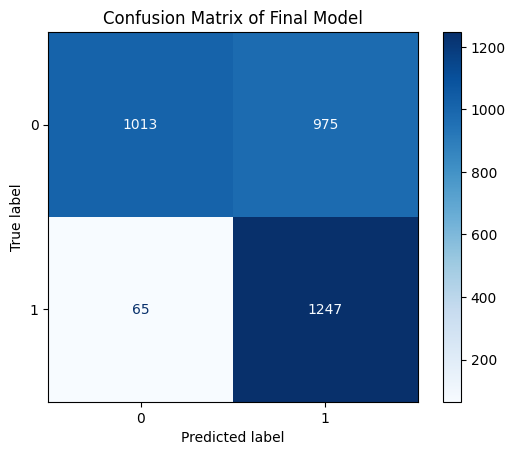

In [27]:
# 혼동 행렬
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix of Final Model")
plt.show()

| Actual / Predicted   | Predicted: Delayed (0) | Predicted: On Time (1) |
|----------------------|------------------------|--------------------------|
| **Actual: Delayed (0)** | TN (True Negative): 1013 | FP (False Positive): 975 |
| **Actual: On Time (1)** | FN (False Negative): 65   | TP (True Positive): 1247 |

- **TP**: Correctly predicted on-time (✓ good)  
- **TN**: Correctly predicted delayed (✓ good)  
- **FP**: Predicted on-time but actually delayed  
  - Could be misleading but not critical from a customer’s perspective  
- **FN**: Predicted delayed but actually on-time  
  - May lead to **unnecessary customer concern** → service quality perception ↓

> ✅ **Interpretation (Summary)**  
Despite the slight drop in accuracy due to **False Positives (FP)**,  
the model maintained a **low number of False Negatives (FN)**,  
which is **more important** in ensuring customer satisfaction.

→ This makes the model **practically valuable** in a service environment.

### Validation 2: Feature Importances of the Champion Model

- Visualized the top 10 most important features in the final LightGBM model.

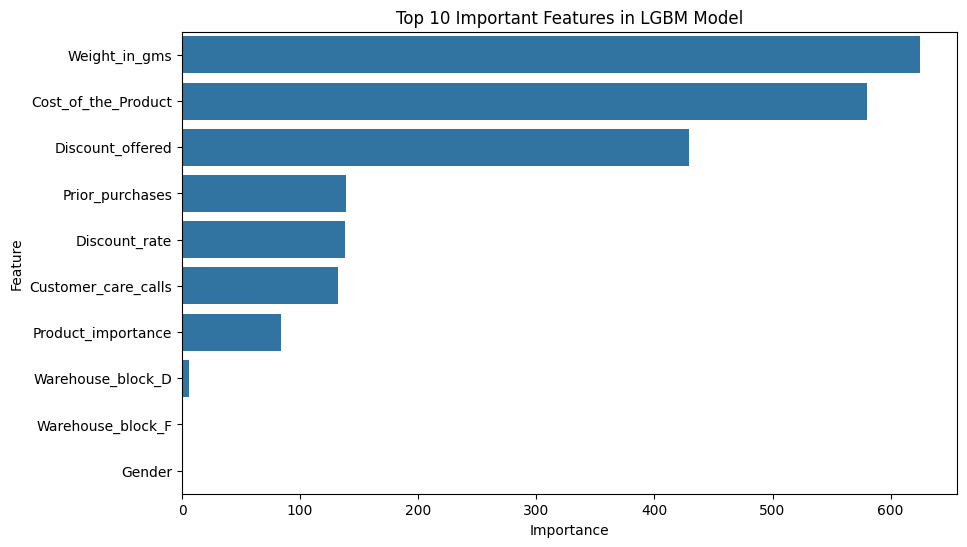

In [28]:
champion_model = grid_search.best_estimator_

# 1. feature importance 추출
importances = champion_model.feature_importances_
feature_names = X.columns

# 2. 정리 및 시각화
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 3. 상위 10개 피처 시각화
plt.figure(figsize=(10,6))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature')
plt.title("Top 10 Important Features in LGBM Model")
plt.show()


### 2-4) Champion Model Saving

- After hyperparameter tuning and evaluation, the final **LightGBM model** was saved using `pickle`.
- This allows future reuse in production or further refinement.

In [29]:
with open("champion_model_e-commerce_On-Time_classification.pkl", "wb") as filename:
    pickle.dump(champion_model, filename)